<a href="https://colab.research.google.com/github/dzhuoying/Assignment-1.4---Spotify/blob/main/Team_3_Spotify_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Ally Dong, Hannah Moreau, Varun Sivakumar, Sahieshnu Vasanthan = Team 3
# EXPLORE:  Hannah
# ENHANCE: Ally, Sahieshnu
# USER: Varun
# GITHUB owner: Ally

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
import os

In [6]:
SPdata = pd.read_csv('spotify_tracks.csv')

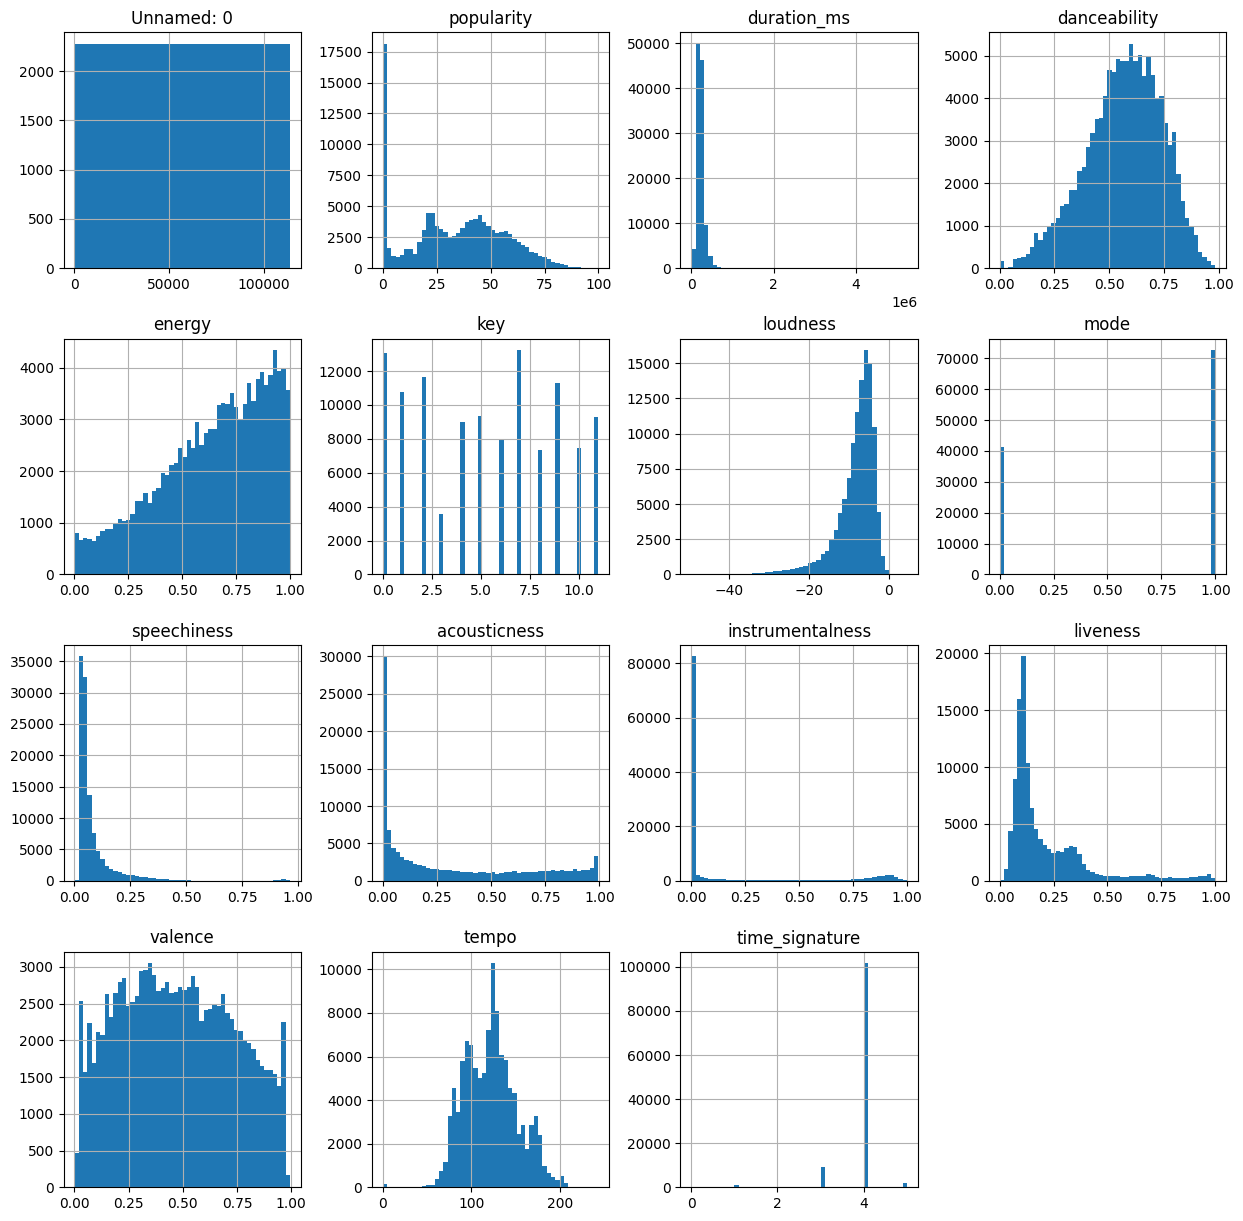

                  Unnamed: 0  popularity  duration_ms  danceability    energy  \
Unnamed: 0          1.000000    0.032142    -0.032743      0.003444 -0.055994   
popularity          0.032142    1.000000    -0.007101      0.035448  0.001056   
duration_ms        -0.032743   -0.007101     1.000000     -0.073426  0.058523   
danceability        0.003444    0.035448    -0.073426      1.000000  0.134325   
energy             -0.055994    0.001056     0.058523      0.134325  1.000000   
key                -0.005520   -0.003853     0.008114      0.036469  0.048006   
loudness           -0.027307    0.050423    -0.003470      0.259077  0.761690   
mode                0.005107   -0.013931    -0.035556     -0.069219 -0.078362   
speechiness        -0.084952   -0.044927    -0.062600      0.108626  0.142509   
acousticness        0.076840   -0.025472    -0.103788     -0.171533 -0.733906   
instrumentalness   -0.070286   -0.095139     0.124371     -0.185606 -0.181879   
liveness            0.033639

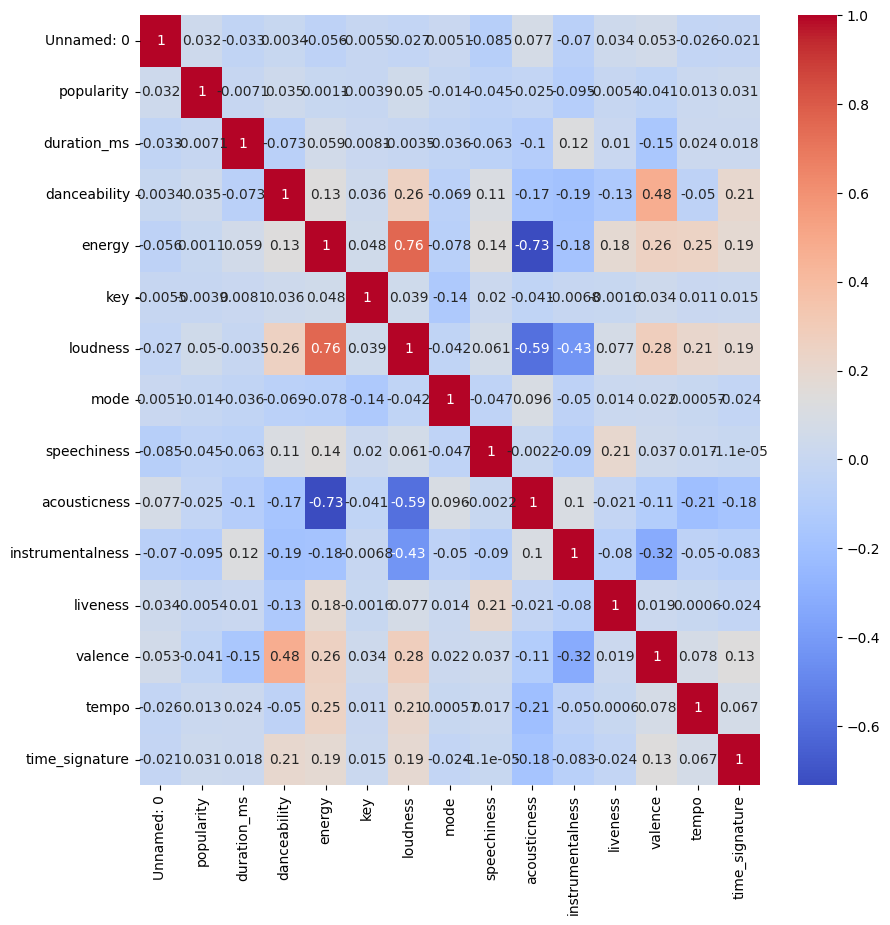

In [7]:
#For Data Exploration
SPdata.hist(bins= 50, figsize=(15,15))
plt.show()

# Calculate correlation matrix only for numeric columns
corr_matrix = SPdata.select_dtypes(include=np.number).corr()
print(corr_matrix)
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
# handle outliers
numeric_cols = SPdata.select_dtypes(include=np.number).columns

for feature in numeric_cols:
    Q1 = SPdata[feature].quantile(0.25)
    Q3 = SPdata[feature].quantile(0.75)
    IQR = Q3 - Q1
    lowerQ = Q1 - 1.5 * IQR
    upperQ = Q3 + 1.5 * IQR

    SPdata = SPdata[(SPdata[feature] >= lowerQ) & (SPdata[feature] <= upperQ)]

SPdata.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.666,98.017,4,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.712,150.960,4,acoustic


In [9]:
# filtering data
data = SPdata[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence", "track_id"]]

In [10]:
# apply index
data.set_index('track_id', inplace=True)

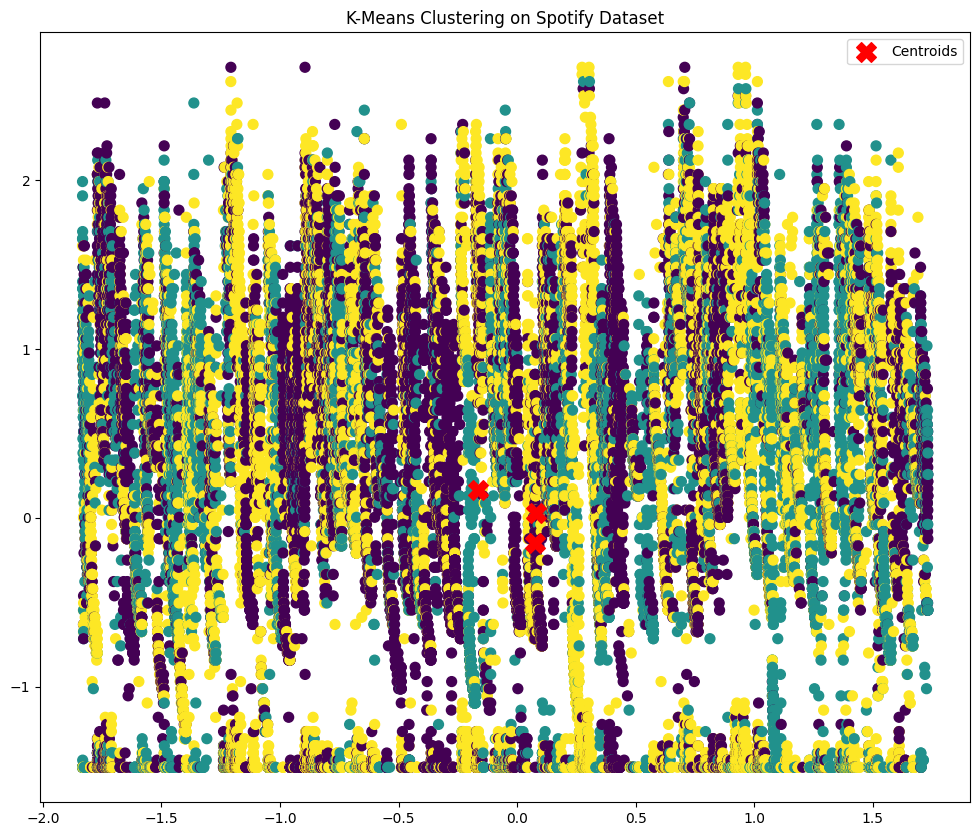

In [20]:
# original KMeans model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(SPdata[numeric_cols])

kmeans = KMeans(n_clusters =3, random_state = 42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering on Spotify Dataset")
plt.legend()
plt.show()

In [11]:
# creating sample data for Agglomerative clustering
sample_size = 1000  # Adjust based on what fits in memory
if len(data) > sample_size:
    indices = np.random.choice(len(data), sample_size, replace=False)
    data_sample = data.iloc[indices]
else:
    data_sample = data

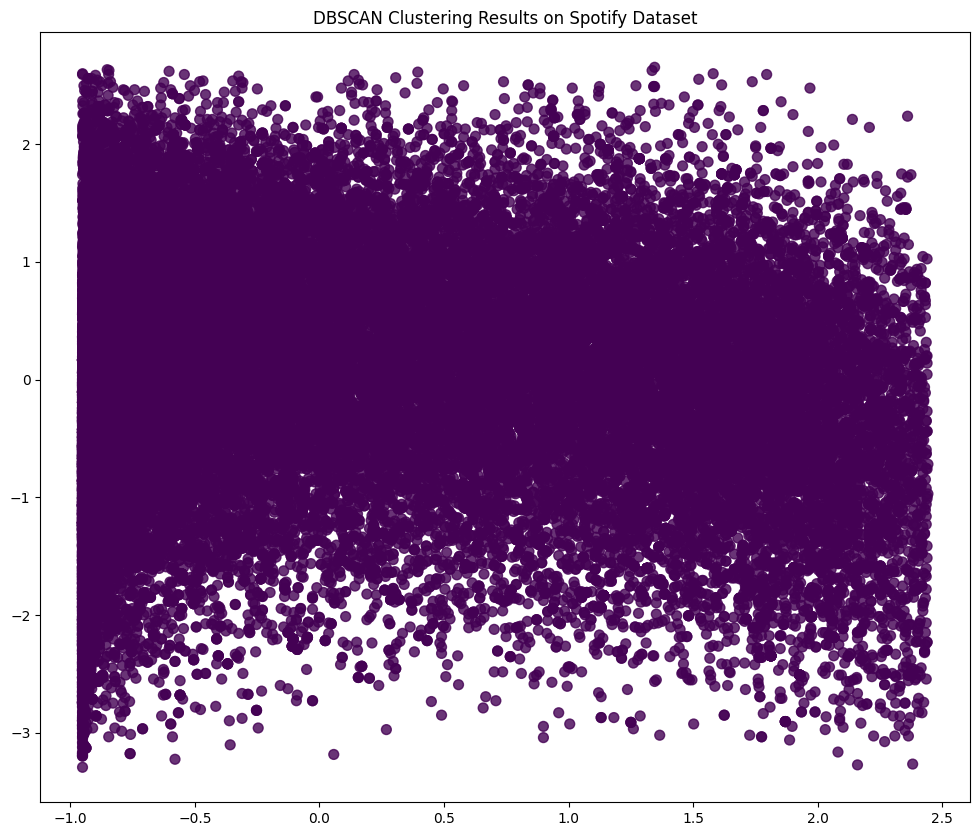

In [12]:
# make DBSCAN clustering algorithm
## replaced with BIRCH
scaler = StandardScaler()
# drop rows with NaN values in the columns used for clustering
data_cleaned = data.dropna(subset=["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"])

X_scaled = scaler.fit_transform(data_cleaned)
dbscan = DBSCAN(eps=5, min_samples=4)
clusters = dbscan.fit_predict(X_scaled)
plt.figure(figsize=(12, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.8)
plt.title('DBSCAN Clustering Results on Spotify Dataset')
plt.show()

In [13]:
# import necessary libraries for dendrogram & agglomerative clustering algorithm
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster

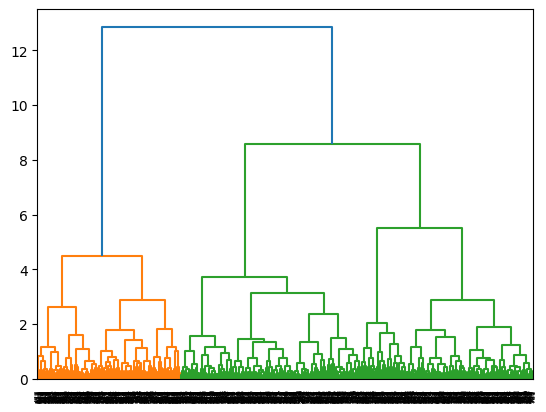

In [15]:
# Run dendrogram on the sample
dendrogram = sch.dendrogram(sch.linkage(data_sample, method='ward'))

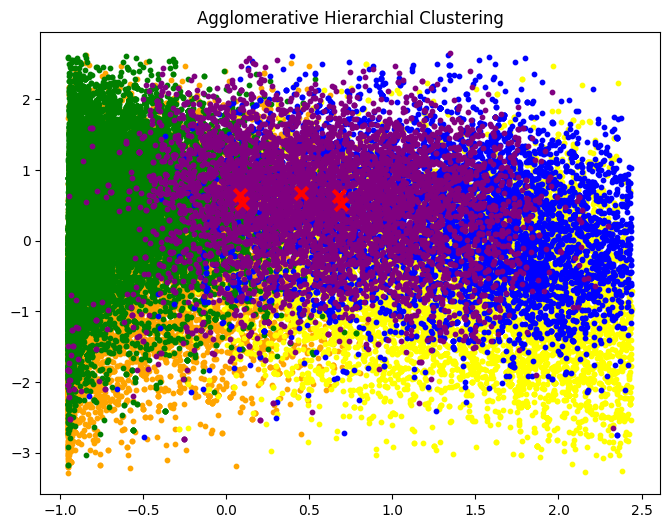

In [19]:
# perform actual clustering
hc = AgglomerativeClustering(n_clusters=5, metric = 'euclidean', linkage='ward')

# renew dataset
y_hc = hc.fit_predict(data)

num_clusters = 5
linked = linkage(data, method='ward')
clusters = fcluster(linked, num_clusters, criterion='maxclust')
centroids = []
for i in range(1, num_clusters + 1):
    cluster_points = data[clusters == i]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)

# plot agglomerative hierarchical clustering
plt.figure(figsize=(8,6))
plt.title("Agglomerative Hierarchial Clustering")
plt.scatter(X_scaled[y_hc ==0,0], X_scaled[y_hc ==0,1], s= 10, c='orange')
plt.scatter(X_scaled[y_hc ==1,0], X_scaled[y_hc ==1,1], s= 10, c='yellow')
plt.scatter(X_scaled[y_hc ==2,0], X_scaled[y_hc ==2,1], s= 10, c='green')
plt.scatter(X_scaled[y_hc ==3,0], X_scaled[y_hc ==3,1], s= 10, c='blue')
plt.scatter(X_scaled[y_hc ==4,0], X_scaled[y_hc ==4,1], s= 10, c='purple')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=80, linewidths=3, color='red', label='Centroids')

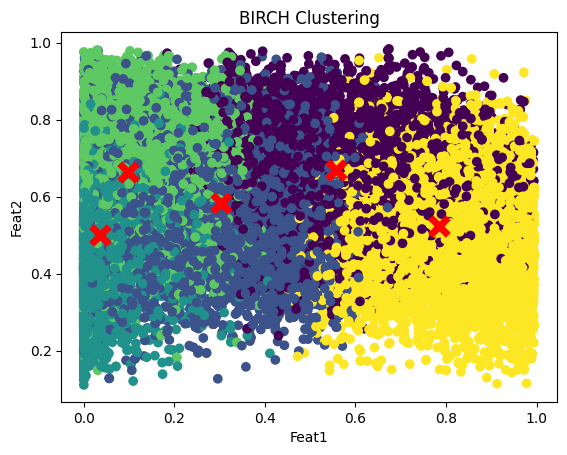

In [17]:
# create BIRCH clustering algorithm
from sklearn.cluster import Birch
data = SPdata[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence", "track_id"]]
data.set_index('track_id', inplace=True)
brc = Birch(threshold=0.37, branching_factor=50, n_clusters=5)
brc.fit(data)
labels = brc.predict(data)

# centroids for BIRCH plot
centrois = brc.subcluster_centers_

# print plot
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(centrois[:, 0], centrois[:, 1], marker='x', s=160, linewidths=5, color='red')
plt.title('BIRCH Clustering')
plt.xlabel('Feat1')
plt.ylabel('Feat2')
plt.show()

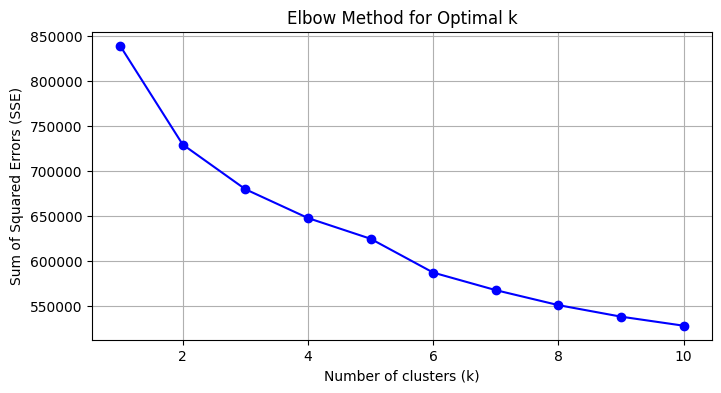

In [21]:
# create Elbow Method to find optimal number of clusters, implemented in Agglomerative, BIRCH, and KMeans-enhanced plots.
sse = []
k_range = range(1,11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

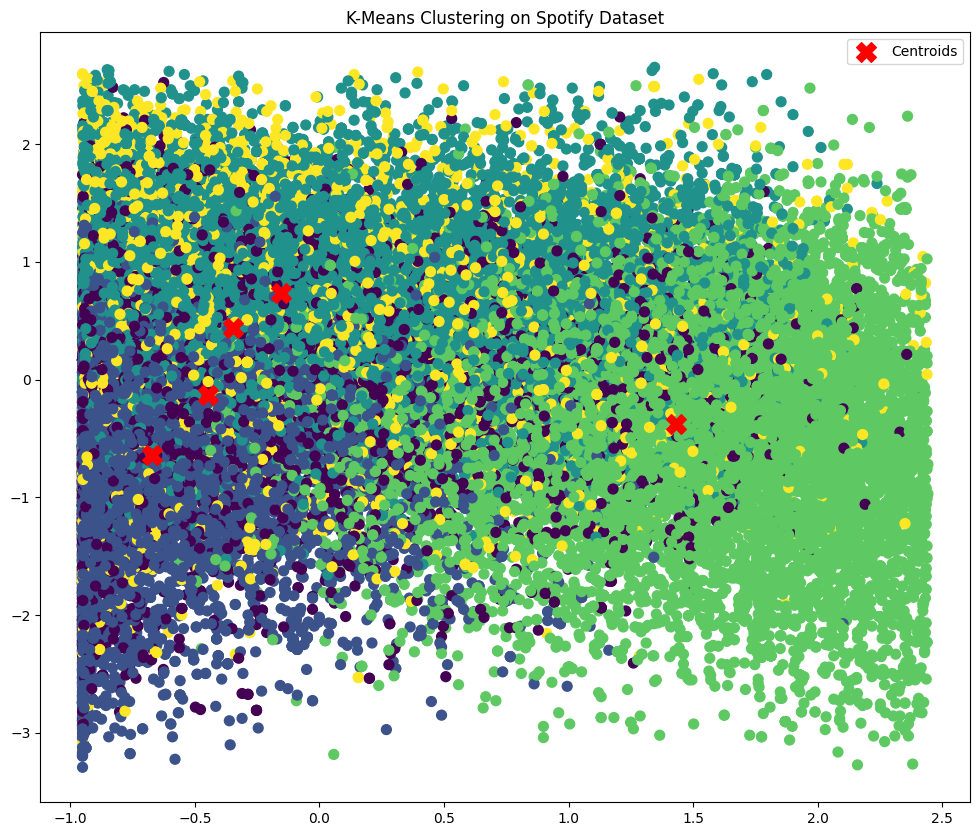

In [22]:
# enhance KMeans model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters =5, random_state = 42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering on Spotify Dataset")
plt.legend()
plt.show()

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Reuse the scaled data and kmeans labels
SPdata['cluster'] = kmeans_labels
SPdata.reset_index(drop=True, inplace=True)

# Create a user-friendly input system
print("🎧 Welcome to the Spotify Recommender!")
print("Enter your favorite song titles, separated by commas (partial names work too):")
user_input = input("▶️  Your songs: ")

# Split input and clean
input_songs = [song.strip().lower() for song in user_input.split(',')]

# Find matches in the dataset
matched_songs = []
# Handle potential missing values in 'track_name' before filtering
SPdata['track_name'] = SPdata['track_name'].fillna('')
for song in input_songs:
    match = SPdata[SPdata['track_name'].str.lower().str.contains(song)]
    if not match.empty:
        matched_songs.append(match.iloc[0])
    else:
        print(f"⚠️  Song not found: '{song}'")

if not matched_songs:
    print("❌ No valid songs found in your input.")
else:
    recommendations = pd.DataFrame()
    for song in matched_songs:
        song_cluster = song['cluster']
        similar_songs = SPdata[(SPdata['cluster'] == song_cluster) &
                               (SPdata['track_id'] != song['track_id'])].sample(n=2, random_state=42)
        recommendations = pd.concat([recommendations, similar_songs])

    print("\n🎶 Here are your personalized recommendations:\n")
    for i, row in recommendations.iterrows():
        print(f"🎵 {row['track_name']} by {row['artists']}")

        # Collect feedback
        feedback = input("👍 Did you like this recommendation? (yes/no): ").strip().lower()
        SPdata.loc[i, 'user_feedback'] = feedback if feedback in ['yes', 'no'] else 'unsure'

    # Show summary of feedback
    print("\n📊 Your Feedback Summary:")
    print(SPdata.loc[recommendations.index, ['track_name', 'artists', 'user_feedback']])

🎧 Welcome to the Spotify Recommender!
Enter your favorite song titles, separated by commas (partial names work too):
▶️  Your songs: comedy, to begin

🎶 Here are your personalized recommendations:

🎵 Call Me by Rangga Jones
👍 Did you like this recommendation? (yes/no): yes
🎵 Sonnenuntergang by Sero
👍 Did you like this recommendation? (yes/no): no
🎵 I Can't Help It by Andy Gibb;Olivia Newton-John
👍 Did you like this recommendation? (yes/no): 
🎵 喜歡你 by LaLa Hsu
👍 Did you like this recommendation? (yes/no): no

📊 Your Feedback Summary:
            track_name                       artists user_feedback
7626           Call Me                  Rangga Jones           yes
19455  Sonnenuntergang                          Sero            no
11297  I Can't Help It  Andy Gibb;Olivia Newton-John        unsure
36651              喜歡你                      LaLa Hsu            no
